# **Manejo de DataSet de vinos para predicción de la calidad**

<a href="https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009">**DataSet Kaggle**</a>

1. [Obtención de datos](#obtención-de-datos)

2. [Lectura de datos y analisis de ellos](#lectura-de-datos-y-analisis-de-ellos)
    1. [Picos](#picos)
     <p></p>

3. [Visualización de datos](#visualización-de-datos)
    1. [Scatter](#scatter-de-ácido-volátil-ácido-citrico-y-calidad-del-vino)

    2. [BoxPlot](#boxplot-de-coorrelaciones)

    3. [Mátriz de coorrelación](#matriz-de-correlación-y-mapa-de-calor)
    
    4. [Scatter Matrix](#scatter-matrix)

4. [Experimentación con columnas](#experimentación-con-columnas)

5. [Preparación de datos](#preparación-de-datos)
    1. [Limpieza](#limpieza)
    
    2. [División de datos](#división-de-datos)

6. [Definición de los modelos](#definición-de-los-modelos)
    1. [LINEAL](#lineal)

    2. [ÁRBOL DE DECISIONES](#árbol-de-decisiones)

    3. [VALIDACIÓN CRUZADA DEL ÁRBOL DE DECISIONES](#validación-cruzada-del-árbol-de-decisiones)

    4. [RANDOM FOREST MODELO](#random-forest-modelo)

    5. [SVR](#svr)

    6. [XGBOOST](#xgboost)

# **Obtención de datos**

Descargamos el dataset de forma local y cogemos su ruta para leer el .csv y meterlo a un DataFrame de Pandas donde trataremos los datos

In [476]:
import pathlib

path=str(pathlib.Path().resolve())+"/"

In [477]:
import pandas as pd


wine = pd.read_csv(path+"winequality-red.csv")

# **Lectura de datos y analisis de ellos**

Leemos los datos y analizamos que tipo de datos son las columnas y vemos cuales son Nulos. Etc...

In [478]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [479]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<p style="color:yellow">ADVERTENCIA</p>Como vemos no tenemos ninguna columna con valores nulos, en caso de tenerlo deberiamos tratarlo en su respectivo tratamiento de datos

In [480]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [481]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Picos

Vemos los picos, donde muchos componen picos normales, pero otros picos son más extraños

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

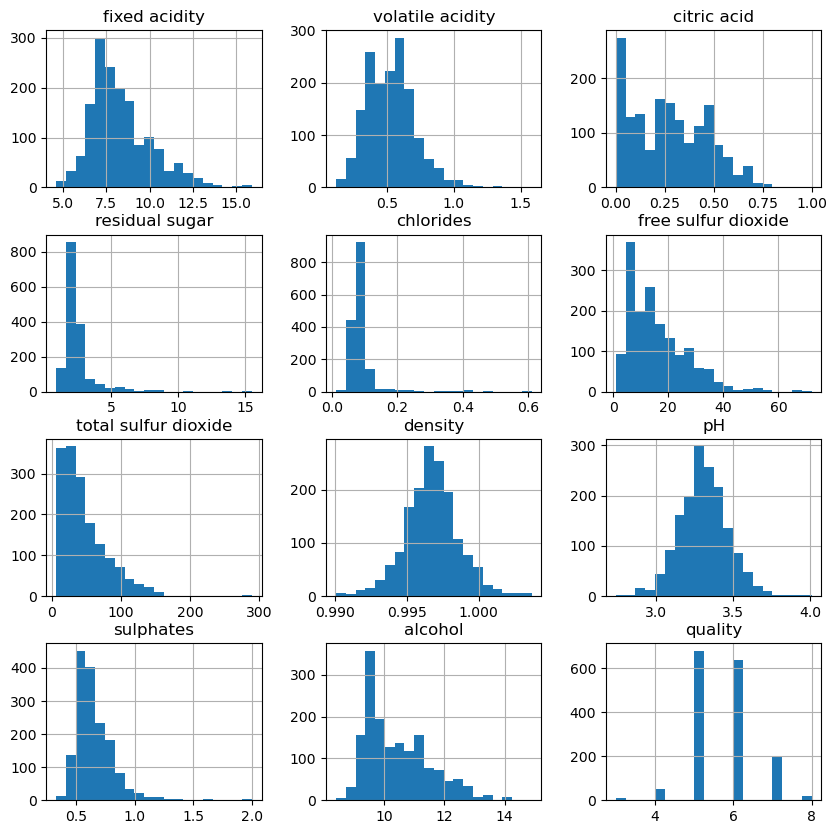

In [482]:
wine.hist(bins=20,figsize=(10,10))

# **Visualización de datos**

## Scatter de ácido volátil, ácido citrico y calidad del vino

Vemos una pequeña relación entre el ácido volatil con el citrico, cuando menos acido cítrico por norma general es mayor el ácido volatil, mientras que si se acerca el vino al pico del ácido volatil, pierde calidad

<Axes: xlabel='citric acid', ylabel='volatile acidity'>

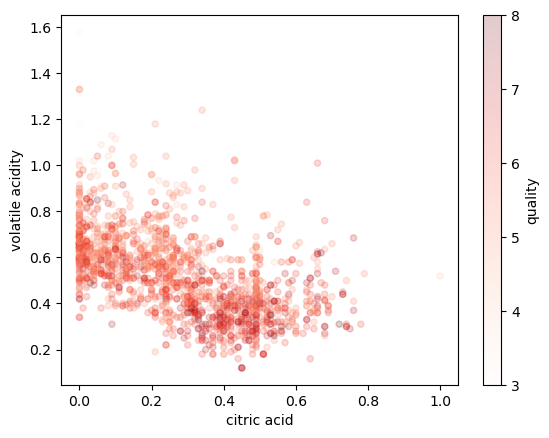

In [483]:
wine.plot.scatter(y="volatile acidity",x="citric acid",alpha=0.2,c="quality",cmap="Reds")

## BoxPlot de coorrelaciones

Tenemos un BoxPlot de las coorrelaciones de la calidad del vino con las diferentes columnas que ya hay en la propia tabla, esto nos permite eliminar los Ouliers que eliminaremos más adelante

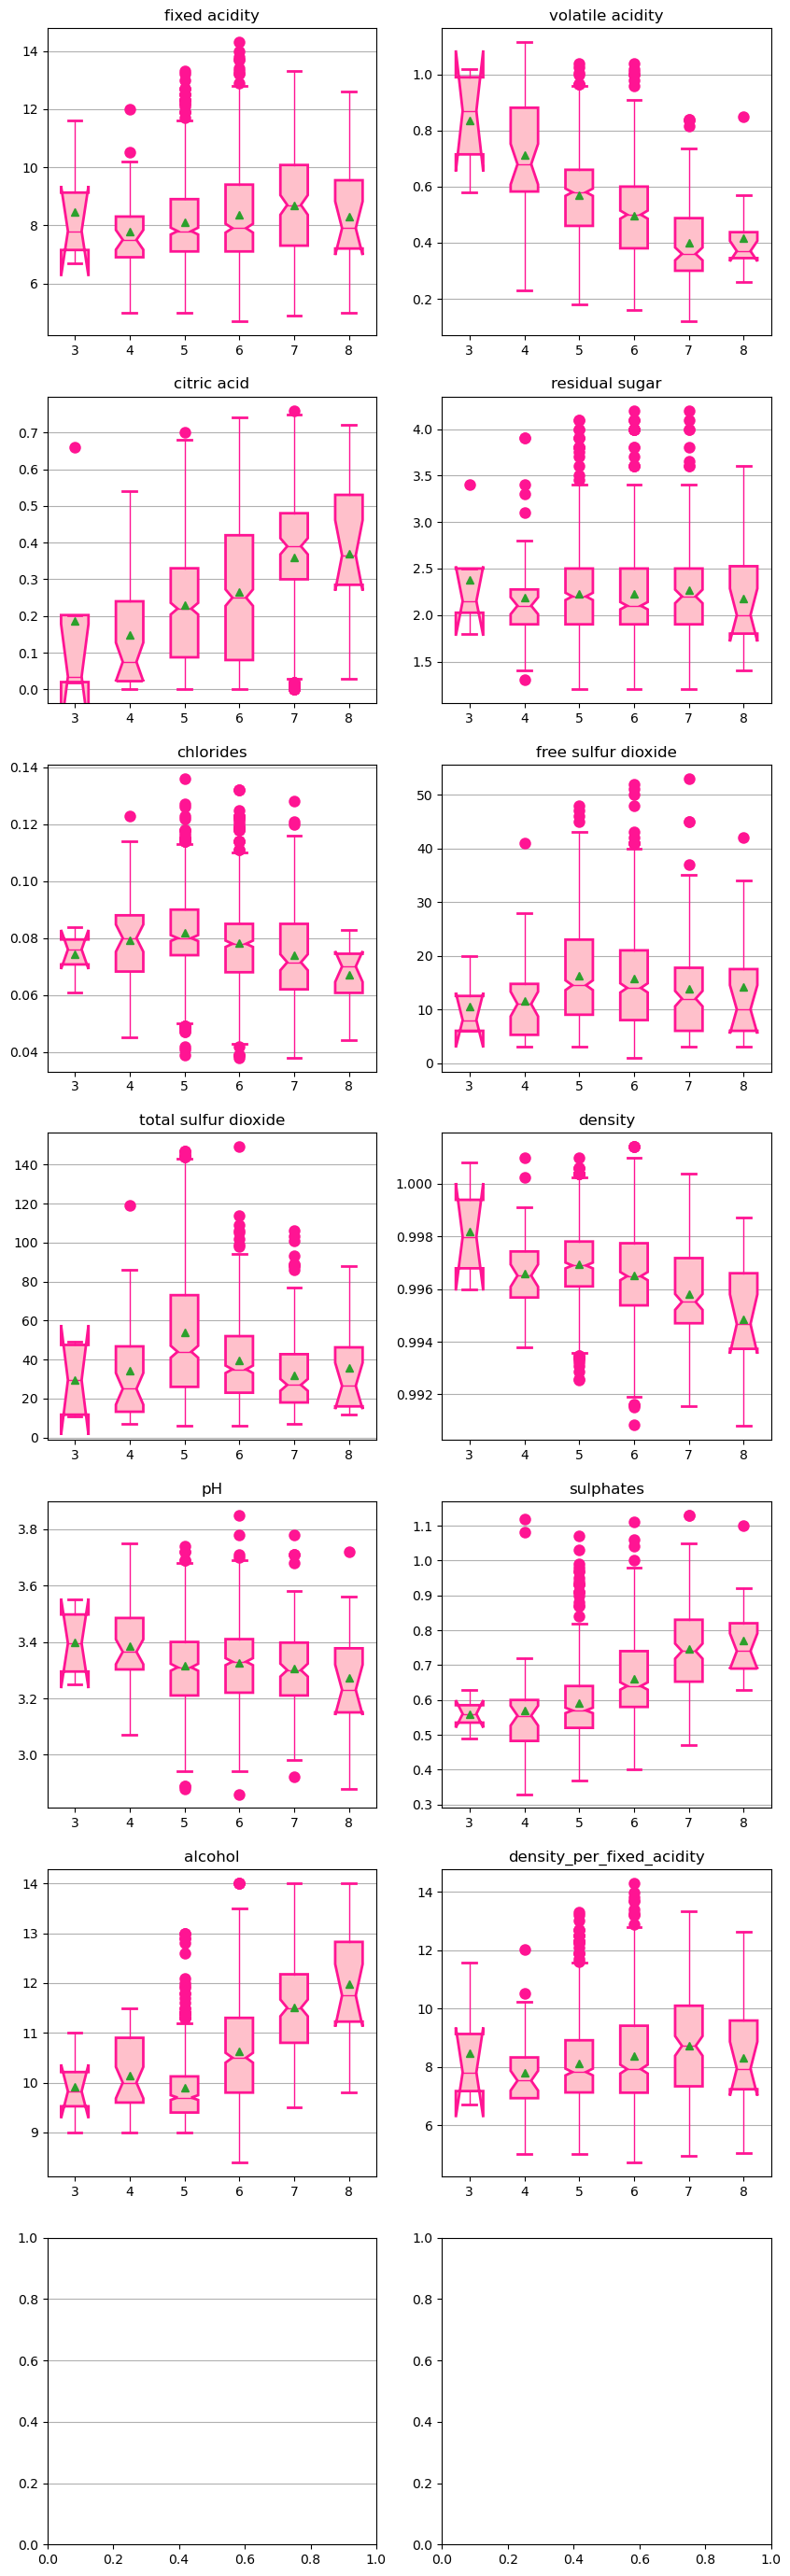

In [520]:
from matplotlib import pyplot as plt

from Clases.Matplot.BoxPlot import BoxPlot


BoxPlot.box_plot(types=wine.columns,by="quality",dataFrame=wine,deepColor="deeppink",faceColor="Pink",color="Pink",ballsColor="deeppink")


## Matriz de correlación y mapa de calor

Con el mapa de calor de las relaciones podemos los campos que más se relacionan entre ellos y los que son más importantes para calidad así permitiendo descartar columnas no muy importantes

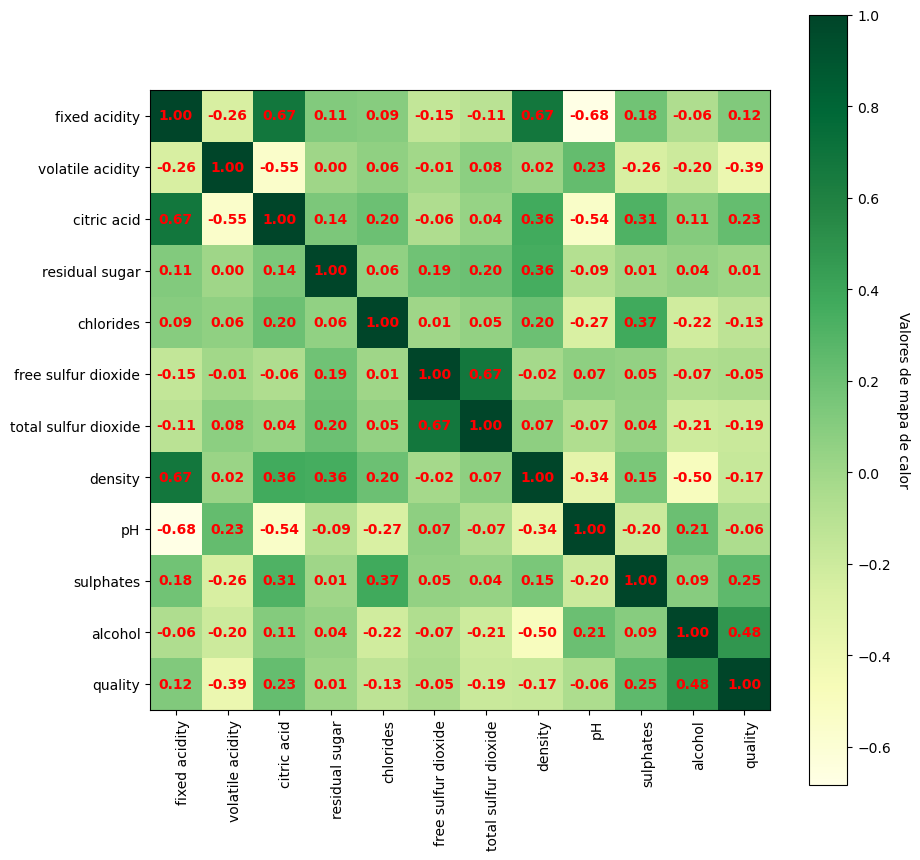

In [485]:
from Clases.Matplot.HeatMap import HeatMap


corr_matrix = wine.corr()
HeatMap.heat_map(corr_matrix,corr_matrix.columns,corr_matrix,corr_matrix.columns,corr_matrix.columns,cmap="YlGn",figsize=(10,10),weight="bold",textColor="red")

## Scatter matrix

Scatter matrix de las columnas para ver los pícos de las columnas y diferencias entre relaciones

array([[<Axes: xlabel='fixed acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='citric acid', ylabel='fixed acidity'>,
        <Axes: xlabel='residual sugar', ylabel='fixed acidity'>,
        <Axes: xlabel='chlorides', ylabel='fixed acidity'>,
        <Axes: xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='density', ylabel='fixed acidity'>,
        <Axes: xlabel='pH', ylabel='fixed acidity'>,
        <Axes: xlabel='sulphates', ylabel='fixed acidity'>,
        <Axes: xlabel='alcohol', ylabel='fixed acidity'>,
        <Axes: xlabel='quality', ylabel='fixed acidity'>],
       [<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='citric acid', ylabel='volatile acidity'>,
        <Axes: xlabel='residual sugar', ylabel='vol

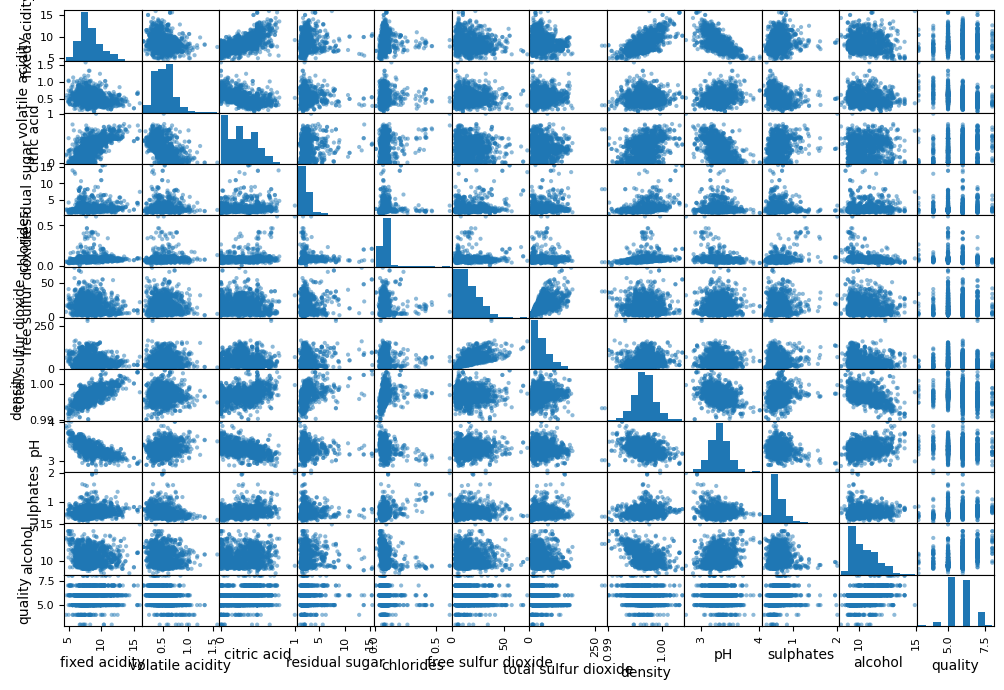

In [486]:
from pandas.plotting import scatter_matrix
columns = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
scatter_matrix(wine[columns], figsize=(12,8))

# **Experimentación con columnas**

En este caso me interesó probar con datos que me parecen que pueden tener relación entre ellos en este caso 
<li style="color:red">El total del sulfuro con su free sulfur</li>
<li style="color:red">El ácido fixed y el cítrico</li>
<li style="color:green">El ácido fixed y la densidad</li>

In [487]:
wine['free_sulfur_dioxide_per_total_sulfur_dioxide'] = wine['total sulfur dioxide']/wine['free sulfur dioxide']

wine['citric_acid_per_fixed_acidity'] = wine['fixed acidity']/wine['citric acid']

wine['density_per_fixed_acidity'] = wine['fixed acidity']/wine['density']

In [488]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,free_sulfur_dioxide_per_total_sulfur_dioxide,citric_acid_per_fixed_acidity,density_per_fixed_acidity
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.029710,-0.265570,0.999975
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,0.053302,0.308526,-0.257987
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.067317,-0.547972,0.672531
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,0.050021,-0.075493,0.112075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,0.081575,-0.089861,0.092681
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.217280,0.015757,-0.154580
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,0.331133,-0.087213,-0.114539
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,0.138697,-0.174274,0.663108
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.108620,0.269624,-0.684398
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.055982,-0.146641,0.182801


Vemos que dos de estas no salen con buenas relaciones, entonces los descartamos

In [489]:
wine.drop(['free_sulfur_dioxide_per_total_sulfur_dioxide',
           'citric_acid_per_fixed_acidity'],axis=1,inplace=True)



# **Preparación de datos**

## Limpieza

Vemos que los campos no tienen nulos por lo que no será necesario tratar los valores nulos de estos

In [490]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   fixed acidity              1599 non-null   float64
 1   volatile acidity           1599 non-null   float64
 2   citric acid                1599 non-null   float64
 3   residual sugar             1599 non-null   float64
 4   chlorides                  1599 non-null   float64
 5   free sulfur dioxide        1599 non-null   float64
 6   total sulfur dioxide       1599 non-null   float64
 7   density                    1599 non-null   float64
 8   pH                         1599 non-null   float64
 9   sulphates                  1599 non-null   float64
 10  alcohol                    1599 non-null   float64
 11  quality                    1599 non-null   int64  
 12  density_per_fixed_acidity  1599 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 162.5 KB


Definimos una función para el tratamiento de Outliers

In [491]:
import numpy as np
from scipy import stats


def tratamiento_outliers(columna,x,y):
    """Min y Max de una columna

    Args:
        columna (object): Columna a tratar
        x (float): Min
        y (float): Max

    Returns:
        List(float): Min y Max
    """
    sorted(columna)
    Q1,Q3 = np.percentile(columna,[x,y])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

def borrar_outliers(df,columns):
    """Borra los Outliers

    Args:
        df (DataFrame): DataFrame con los datos
        columns (X): Columnas

    Returns:
        DataFrame: Nuevo DataFrame con los datos borrados
    """
    for i in columns:
        if df[i].dtype == 'float64':
            low,high=tratamiento_outliers(df[i],17.5,82.5)
            df.drop(
                df[(df[i] > high) | (df[i] < low) ].index , 
                inplace=True)
            #df_filtrado = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
    return df

In [492]:
#columnas=["quality","alcohol","sulphates","chlorides","residual sugar","citric acid","fixed acidity"]
#columnas = ["quality","alcohol","sulphates","pH","density","total sulfur dioxide","free sulfur dioxide","chlorides","residual sugar","citric acid","volatile acidity","fixed acidity"]
s = wine['quality']
wine.drop('quality',axis=1,inplace=True)
columnas = wine.columns
wine=borrar_outliers(wine,columnas)
wine['quality'] = s
columnas = wine.columns
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,density_per_fixed_acidity,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,7.416316,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,7.825040,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,7.823470,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,11.222445,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,7.416316,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,6.231782,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,5.928933,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.326953,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.926849,5


In [493]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler(feature_range=(0,1))


#wine['fixed acidity'] = scaler.fit_transform(wine[['fixed acidity']])
#wine['volatile acidity'] = scaler.fit_transform(wine[['volatile acidity']])
#wine['citric acid'] = scaler.fit_transform(wine[['citric acid']])


## División de datos

Definimos una función para dividir el entrenamiento con un ratio (Ya existe una función que lo hace por si solo)

In [494]:
def split_train_test(data,test_ratio):
    # indices = [i for i in range(len(data))]; indices = np.shuffle(.....)
  # NOS DA UNA LSITA BARAJADA
  indices = np.random.permutation(len(data))
  # LE DECIMOS CUANTO TEST SE USARÁ
  lg_test = int(len(data) * test_ratio)
  # SE REPARTEN
  test_indices = indices[:lg_test]
  train_indices = indices[lg_test:]
  # Y SE DEVUELVE UNA TABLA DE ENTRENAMIENTO Y OTRA DE TEST
  return data.iloc[train_indices], data.iloc[test_indices]

In [495]:
np.random.seed(42)
x_train,x_test = split_train_test(wine,0.2)

In [496]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,density_per_fixed_acidity,quality
1497,6.9,0.740,0.03,2.3,0.054,7.0,16.0,0.99508,3.45,0.63,11.5,6.934116,6
496,7.8,0.520,0.25,1.9,0.081,14.0,38.0,0.99840,3.43,0.65,9.0,7.812500,6
446,12.5,0.380,0.60,2.6,0.081,31.0,72.0,0.99960,3.10,0.73,10.5,12.505002,5
853,9.3,0.360,0.39,1.5,0.080,41.0,55.0,0.99652,3.47,0.73,10.9,9.332477,6
1271,7.3,0.440,0.20,1.6,0.049,24.0,64.0,0.99350,3.38,0.57,11.7,7.347760,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,8.0,0.715,0.22,2.3,0.075,13.0,81.0,0.99688,3.24,0.54,9.5,8.025038,6
1322,9.1,0.340,0.42,1.8,0.058,9.0,18.0,0.99392,3.18,0.55,11.4,9.155666,5
1506,6.8,0.810,0.05,2.0,0.070,6.0,14.0,0.99562,3.51,0.66,10.8,6.829915,6
1008,8.9,0.350,0.40,3.6,0.110,12.0,24.0,0.99549,3.23,0.70,12.0,8.940321,7


Definimos las variables x_train y y_train que serán los datos para entrenar el modelo

In [497]:
x_train = x_train.loc[:,columnas]

#y_train = dt_train["quality"].copy()
#x_train = dt_train.drop(["quality"],axis=1)

y_train = x_train["quality"].copy()
x_train = x_train.drop(["quality"],axis=1)

x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,density_per_fixed_acidity
1497,6.9,0.740,0.03,2.3,0.054,7.0,16.0,0.99508,3.45,0.63,11.5,6.934116
496,7.8,0.520,0.25,1.9,0.081,14.0,38.0,0.99840,3.43,0.65,9.0,7.812500
446,12.5,0.380,0.60,2.6,0.081,31.0,72.0,0.99960,3.10,0.73,10.5,12.505002
853,9.3,0.360,0.39,1.5,0.080,41.0,55.0,0.99652,3.47,0.73,10.9,9.332477
1271,7.3,0.440,0.20,1.6,0.049,24.0,64.0,0.99350,3.38,0.57,11.7,7.347760
...,...,...,...,...,...,...,...,...,...,...,...,...
1278,8.0,0.715,0.22,2.3,0.075,13.0,81.0,0.99688,3.24,0.54,9.5,8.025038
1322,9.1,0.340,0.42,1.8,0.058,9.0,18.0,0.99392,3.18,0.55,11.4,9.155666
1506,6.8,0.810,0.05,2.0,0.070,6.0,14.0,0.99562,3.51,0.66,10.8,6.829915
1008,8.9,0.350,0.40,3.6,0.110,12.0,24.0,0.99549,3.23,0.70,12.0,8.940321


# **Definición de los modelos**

## LINEAL

In [498]:
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

# Mejora un poco el lineal y otros modelos pero el SVR por mucho

In [499]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

# MÓDELO CREADO

LinearRegression()

In [500]:
datos_prueba =  x_train[:10]
print("PREDICCIONES: ",lin_reg.predict(datos_prueba))
y_reales = y_train[:10]
print("Reales: ", list(y_reales))

PREDICCIONES:  [5.76892367 5.19170863 5.93830324 6.04943689 5.99573701 6.32106539
 5.29558685 5.54078951 5.44938006 6.40312488]
Reales:  [6, 6, 5, 6, 6, 6, 6, 6, 6, 5]


In [501]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

predicciones = lin_reg.predict(x_train)
mse = mean_squared_error(y_train, predicciones)
mse = np.sqrt(mse)
mae = mean_absolute_error(y_train, predicciones)
score = r2_score(y_train, predicciones)
# No lo realiza tan mal
print(f"mae(ERROR MEDIO ABSOLUTO): {mae}   mse(ERROR CUADRÁTICO): {mse}  score:{score}")
#0.41289732123363987

mae(ERROR MEDIO ABSOLUTO): 0.46675795312013585   mse(ERROR CUADRÁTICO): 0.5998217071791364  score:0.41289732123364


Vemos que tiene un Score bastante alto para ser un modelo lineal

### VALIDACIÓN CRUZADA LINEAL

In [502]:
from sklearn.model_selection import cross_val_score


lin_score = cross_val_score(lin_reg, x_train, y_train,
                            scoring = "neg_mean_squared_error", cv=10)
root_lin_score = np.sqrt(-lin_score)
print("Scores: ", root_lin_score)
print("Media: ", root_lin_score.mean())
print("Desviación Std", root_lin_score.std())

Scores:  [0.6400146  0.49071128 0.63136019 0.57429388 0.68767708 0.70603032
 0.52410672 0.571888   0.61012664 0.62199395]
Media:  0.6058202647966395
Desviación Std 0.0639662100819403


## ÁRBOL DE DECISIONES

In [503]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [504]:
datos_prueba =  x_train
p = tree_reg.predict(datos_prueba)
#print("PREDICCIONES: ",p)
y_reales = y_train
#print("Reales: ", list(y_reales))
for index,i in enumerate(p):
    if i != list(y_reales)[index]:
        print(f"EN LA POSICIÓN {index} ES DIFERENTE: \nEL REAL: {list(y_reales)[index]} -- LA PREDICCIÓN: {i}")

In [505]:
predicciones = tree_reg.predict(x_train)
mse = mean_squared_error(y_train, predicciones)
mse = np.sqrt(mse)
mae = mean_absolute_error(y_train, predicciones)
score = r2_score(y_train, predicciones)
print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

mae: 0.0   rmse: 0.0 r2_score: 1.0


Tiene un Score de 1.0 Pero engañoso, en el momento que pongamos un dato fuera del DataSet este fallará

### VALIDACIÓN CRUZADA DEL ÁRBOL DE DECISIONES

In [506]:
from sklearn.model_selection import cross_val_score

lin_score = cross_val_score(tree_reg, x_train, y_train,
                            scoring = "neg_mean_squared_error", cv=10)
root_lin_score = np.sqrt(-lin_score)
print("Scores: ", root_lin_score)
print("Media: ", root_lin_score.mean())
print("Desviación Std", root_lin_score.std())

Scores:  [0.8542422  0.7593264  0.6644106  0.72285719 0.89543386 0.92932038
 0.78624539 0.69413124 0.81463879 0.83666003]
Media:  0.7957266078641319
Desviación Std 0.0821805662643057


Vemos que este modelo tiene bastante buena media en el modelo

## RANDOM FOREST MODELO

*<p style="color:yellow">(DE LOS MÁS UTILIZADOS, ÁRBOL QUE FUNCIONA CORRECTAMENTE Y MÁS SIMPLE)</p>*

In [507]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100)

rf_reg.fit(x_train, y_train)

RandomForestRegressor()

In [508]:
predicciones = rf_reg.predict(x_train)
mse = mean_squared_error(y_train, predicciones)
mse = np.sqrt(mse)
mae = mean_absolute_error(y_train, predicciones)
score = r2_score(y_train, predicciones)

# DE LOS MAYORES SCORES QUE TIENE -1 - 1
print(f"mae: {mae}   rmse: {mse} r2_score: {score}")
#r2_score: 0.9295646085617493

mae: 0.1492488687782805   rmse: 0.21065036116900793 r2_score: 0.9275907380282895


In [509]:
datos_prueba =  x_train[:20]
p = rf_reg.predict(datos_prueba)
print("PREDICCIONES: ",p)
y_reales = y_train[:20]
print("Reales: ", list(y_reales))

PREDICCIONES:  [5.95 5.94 5.39 6.02 5.97 6.11 5.91 5.92 5.92 5.42 4.98 4.91 6.55 5.22
 5.12 5.06 5.93 4.36 6.86 5.18]
Reales:  [6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5, 7, 5, 5, 5, 6, 4, 7, 5]


Vemos que las mediciones son más precisas con un Score mucho más alto

In [510]:
# VALIDACIÓN DE TIPO CROSS AL RANDOM TREE FOREST

rf_score = cross_val_score(rf_reg, x_train, y_train,
                            scoring = "neg_mean_squared_error", cv=10)
root_lin_score = np.sqrt(-rf_score)
print("RF cross")
print("Scores: ", root_lin_score)
print("Media: ", root_lin_score.mean())
print("Desviación Std", root_lin_score.std())

RF cross
Scores:  [0.59544971 0.46784921 0.5431921  0.49369995 0.68492388 0.64943752
 0.55761587 0.56150771 0.55595209 0.56666248]
Media:  0.5676290515384809
Desviación Std 0.061252269517997386


## SVR

*<p style="color:yellow">(DE LO MÁS UTILIZADO)</p>*

In [511]:
from sklearn.svm import SVR

sv_reg = SVR()

sv_reg.fit(x_train, y_train)

SVR()

In [512]:
predicciones = sv_reg.predict(x_train)
mse = mean_squared_error(y_train, predicciones)
mse = np.sqrt(mse)
mae = mean_absolute_error(y_train, predicciones)
score = r2_score(y_train, predicciones)
print(f"mae: {mae}   rmse: {mse} r2_score: {score}")
#0.5982260797614003

mae: 0.3474105477079285   rmse: 0.4990204197091915 r2_score: 0.5936443158516396


In [513]:
datos_prueba =  x_train[:20]
p = sv_reg.predict(datos_prueba)
print("PREDICCIONES: ",p)
y_reales = y_train[:20]
print("Reales: ", list(y_reales))

PREDICCIONES:  [5.89970232 5.60086901 5.90098922 5.98433814 5.89965571 6.08361364
 5.33864114 5.59088295 5.62321024 6.51597525 4.97920595 4.90000647
 5.25583844 5.11204066 5.85326928 5.0995878  5.93664114 4.98471172
 6.55640325 5.55092485]
Reales:  [6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5, 7, 5, 5, 5, 6, 4, 7, 5]


In [514]:
svg_score = cross_val_score(sv_reg, x_train, y_train,
                            scoring = "neg_mean_squared_error", cv=10)
root_lin_score = np.sqrt(-svg_score)
print("SV cross")
print("Scores: ", root_lin_score)
print("Media: ", root_lin_score.mean())
print("Desviación Std", root_lin_score.std())

SV cross
Scores:  [0.62978902 0.49385843 0.59566504 0.53118555 0.73217688 0.67848755
 0.54914788 0.54481203 0.59085994 0.61776563]
Media:  0.5963747945049509
Desviación Std 0.0681454682361007


Vemos que la media es decente y su Score tmb pero hay modelos con mejores resultados como el Random Forest

# **XGBOOST**

*(EL MÁS UTILIZADO ACTUALMENTE Y MUY EXTACTO)*

In [515]:
#!conda install -y -c conda-forge xgboost

In [516]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(objetive="reg:squarederror")

#x_train['quality_cat'] = x_train['quality_cat'].astype(int)
xgb_reg.fit(x_train, y_train)

[17:49:27] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "objetive" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objetive='reg:squarederror', predictor=None, ...)

In [517]:
predicciones = xgb_reg.predict(x_train)
mse = mean_squared_error(y_train, predicciones)
mse = np.sqrt(mse)
mae = mean_absolute_error(y_train, predicciones)
score = r2_score(y_train, predicciones)
print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

mae: 0.024222892226137188   rmse: 0.03836793205166322 r2_score: 0.9975978147862669


In [518]:
datos_prueba =  x_train[:20]
p = xgb_reg.predict(datos_prueba)
print("PREDICCIONES: ",p)
y_reales = y_train[:20]
print("Reales: ", list(y_reales))

PREDICCIONES:  [5.997614  5.9940715 5.0397744 6.001376  5.9910226 6.020816  5.995669
 5.9510455 5.9959497 5.0803623 4.9765472 5.0183864 6.826909  5.0246143
 5.010532  5.021578  5.9740133 4.108942  6.9834337 5.1001954]
Reales:  [6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5, 7, 5, 5, 5, 6, 4, 7, 5]


In [519]:
xgb_score = cross_val_score(xgb_reg, x_train, y_train,
                            scoring = "neg_mean_squared_error", cv=10)
root_lin_score = np.sqrt(-xgb_score)
print("XGB cross")
print("Scores: ", root_lin_score)
print("Media: ", root_lin_score.mean())
print("Desviación Std", root_lin_score.std())

[17:49:27] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "objetive" } are not used.

[17:49:28] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "objetive" } are not used.

[17:49:28] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "objetive" } are not used.

[17:49:28] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "objetive" } are not used.

[17:49:28] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "objetive" } are not used.

[17:49:28] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "objetive" } are not used.

[17:49:28] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "objetive" } are not used.

[17:49

Vemos que esta es el que mejores resultados dá, dando casi un Score de 1 siendo e máximo, manteniendo una media de casi 0.6